# Exercise 4a

Group Members: Luis Pazos Clemens, Robert Freund, Eugen Dizer

Deadline: 12.01.2021, 16:00.

In [1]:
#Load standard libraries
import numpy as np   
import matplotlib.pyplot as plt   
%matplotlib inline

import pandas as pd
import os

## 2 Red Cards Study

Download the dataset from https://osf.io/gvm2z/ (`1. Crowdsourcing Dataset July 01, 2014 Incl.Ref Country.zip` contains the dataset, `README.txt` a detailed description of the data and `2._Crowdstorming_Pictures_Skin_Color_Ratings.zip` the images of the players). Feel free to look at `Crowdsourcing Analytics - Final Manuscript.pdf` for a more detailed description of the experiment, its features, and the different methods participants applied to tackle the question.

### 2.1 Loading and Cleaning the Data

The first step consists of loading the `.csv` file and preparing the data for the experiment. One participant of the official experiment provided a nice jupyter notebook demonstrating how the python library
`pandas` can be utilized to achieve this: http://nbviewer.ipython.org/github/mathewzilla/redcard/blob/master/Crowdstorming_visualisation.ipynb. You should get inspiration from this example, but still choose your own data preparation steps.

In [2]:
# Import original data and get it in displayable form.
file = os.path.join('data','CrowdstormingDataJuly1st.csv') 
df = pd.read_csv(file)

By default the data is in a rather counter-intuitive format: referee-player dyads.

A referee-player dyad describes the interactions between a particular ref and one player. This means that each row in the dataset is of a unique player-ref combination, listing all of the games by a given player with a particular referee at any point in his career. Let's look at the first few rows of the dataset as an example:

In [3]:
# Display the first 10 rows of the dataset. Only 13 columns for space reasons
df.iloc[:10,:13]

,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,ties,defeats,goals
0,lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,31.08.1983,177.0,72.0,Attacking Midfielder,1,0,0,1,0
1,john-utaka,John Utaka,Montpellier HSC,France,08.01.1982,179.0,82.0,Right Winger,1,0,0,1,0
2,abdon-prats,Abdón Prats,RCD Mallorca,Spain,17.12.1992,181.0,79.0,NaN,1,0,1,0,0
3,pablo-mari,Pablo Marí,RCD Mallorca,Spain,31.08.1993,191.0,87.0,Center Back,1,1,0,0,0
4,ruben-pena,Rubén Peña,Real Valladolid,Spain,18.07.1991,172.0,70.0,Right Midfielder,1,1,0,0,0
5,aaron-hughes,Aaron Hughes,Fulham FC,England,08.11.1979,182.0,71.0,Center Back,1,0,0,1,0
6,aleksandar-kolarov,Aleksandar Kolarov,Manchester City,England,10.11.1985,187.0,80.0,Left Fullback,1,1,0,0,0
7,alexander-tettey,Alexander Tettey,Norwich City,England,04.04.1986,180.0,68.0,Defensive Midfielder,1,0,0,1,0
8,anders-lindegaard,Anders Lindegaard,Manchester United,England,13.04.1984,193.0,80.0,Goalkeeper,1,0,1,0,0
9,andreas-beck,Andreas Beck,1899 Hoffenheim,Germany,13.03.1987,180.0,70.0,Right Fullback,1,1,0,0,0


In [4]:
# Display the other columns too
df.iloc[:10,13:28]

,yellowCards,yellowReds,redCards,photoID,rater1,rater2,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
0,0,0,0,95212.jpg,0.25,0.50,1,1,GRC,0.326391,712.0,0.000564,0.396000,750.0,0.002696
1,1,0,0,1663.jpg,0.75,0.75,2,2,ZMB,0.203375,40.0,0.010875,-0.204082,49.0,0.061504
2,1,0,0,NaN,NaN,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
3,0,0,0,NaN,NaN,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
4,0,0,0,NaN,NaN,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
5,0,0,0,3868.jpg,0.25,0.00,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752
6,0,0,0,47704.jpg,0.00,0.25,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752
7,0,0,0,22356.jpg,1.00,1.00,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752
8,0,0,0,16528.jpg,0.25,0.25,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752
9,0,0,0,36499.jpg,0.00,0.00,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752


We already see some strange things in the data. Some refs officiated very few games. The two raters disagree about player skintone quite often. For some players there isn't a photo, so their skin tone couldn't be rated. Most dyads don't feature cards at all. In general, it's difficult to get an intuition for what the population looks like from inspecting small samples of the data. This is particularly difficult in the dyad format, as each player or ref's cards are spread un-evenly across the dataset.

#### Data Preparation Steps

The following questions may guide
you:

- What do the feature names (e.g. `column games`) stand for?
  - There is a list (`README.md`) that explains all the names.
- Which irrelevant features might be dropped?
  - We dropped the name of the players but kept the short code to distinguish the players.
  - Also the players characteristics like weight, height, etc. are not important.
  - The club and league is not important.
- What relevant features might be missing, but can be computed? E.g., you can obtain the age of a player (which might be relevant) from his birthday, or create entirely new features by non-linear combinations of existing ones.
  - We combined yellowReds and redCards into total number of red cards ('reds')
  - We don't think that there are more relevant features.
- Are there missing data values (e.g. missing skin color ratings), and how should they be dealt with (see https://en.wikipedia.org/wiki/Missing_data)?
  - Yes, there are missing data values. We just drop them from our data set and don't use them for training.
- How good are the skin color ratings? Do the raters agree?
  - The ratings disagree quite often but are not too different. That's why we just take the mean of the two ratings (reported as the new 'skin' column). A simple chart shows this disagreement below in the code.
- Should referees with very few appearances be excluded from the dataset?
  - No, they should not. We take every referee into account.
- Should features be normalized and/or centralized?
  - For each unique player, we calculate an average probability of getting a red card from all his encounters with different referees.

Categorical features (e.g. `league`) should be transformed to a one-hot  ncoding (see https://en.wikipedia.org/wiki/One-hot). In case of league, you can also repreat the experiment independently for the different leagues to check if there are differences between countries. Provide a detailed description and justification of your data preparation.

In [5]:
### Cleaning the data:

df2 = df.dropna(subset=['photoID'])  #drop all dyads without photo

df2 = df2.assign(skin=df.loc[:, ["rater1", "rater2"]].mean(axis=1))   #create skin feature (mean of the 2 raters)

df2 = df2.assign(reds=df.loc[:, ["yellowReds", "redCards"]].sum(axis=1))   # create new column summing both types of red cards

### simple chart to show disagreement in skin colour evaluation:
df3 = df2.groupby(["playerShort",'rater1', 'rater2'], as_index=False).sum()  
rate_diff = abs(df3['rater1'] - df3['rater2']).value_counts()
print('Raters Disgreement (absolute difference between the 2 skin rates | percentaage of players): \n', rate_diff/len(df3['rater1'])*100 )
###

DATA = df2.groupby(["playerShort",'skin'], as_index=False).sum()  #group dyads by player; now number of rows = number of players

DATA["reds/N"] = DATA["reds"]/DATA["games"]   # create new column with the label corresponding to each player

DATA = DATA.loc[:,["skin","reds/N","refNum"]]   #display final DATA; just skin (1D feature) and red cards/games played (labels)
DATA

#DATA = DATA.loc[:,["playerShort","games","reds","skin","reds/N"]]   #we could show other columns too
#DATA = DATA.groupby("skin", as_index=False).mean()  

Raters Disgreement (absolute difference between the 2 skin rates | percentaage of players): 
 0.00    76.088328
0.25    23.785489
0.50     0.126183
dtype: float64


,skin,reds/N,refNum
0,0.125,0.000000,267701
1,0.125,0.002976,164589
2,0.250,0.000000,161486
3,0.000,0.003846,173524
4,0.250,0.048387,59603
...,...,...,...
1580,0.250,0.005102,220384
1581,0.000,0.000000,79202
1582,0.875,0.020253,140649
1583,0.000,0.042553,34125


### 2.2 Model Creation

#### Linear Regression

Linear regression determines a weighted sum of the features $\hat{Y}_i = X_i \hat{\beta} + \hat{b}$, where optimal weights
and intercept minimize the squared error:

\begin{equation}
\hat{\beta}, \, \hat{b} = \text{arg min}_{\beta, b} \sum_i (X_i \beta + b - Y_i^*)^2 \,.
\end{equation}

Differentiating with respect to $\beta$ and $b$ and finding the minimum yields:
\begin{equation}
\hat{\beta} = \frac{\sum_i X_i Y_i^* - N \bar{X}\bar{Y}^*}{\sum_i X_i^2 - N \bar{X}^2} \,, \,
\hat{b} = \bar{Y}^* - \hat{\beta} \bar{X} \,,
\end{equation}
where $N$ is the total number of players and $\bar{X}$, $\bar{Y}^*$ are the averages of $X_i$ and $Y_i^*$.

In [6]:
class LinearRegression:
    def __init__(self):
        self.beta = None
        self.b = None
      
    def train(self, data, labels):
        '''
        data: the feature matrix (N, D)
        labels: the corresponding ground-truth responses (N)
        '''
        N, D = data.shape # N: number of players, D: feature dimension
        labels = labels.reshape((N, 1))

        # Average feature and label vector
        X = np.mean(data, axis=0)
        Y = np.mean(labels, axis=0)

        self.beta = ( np.mean(data * labels, axis=0) - X * Y ) / ( np.mean(np.sum(data**2, axis=1), axis=0) - np.dot(X, X) )
        self.b = Y - np.dot(self.beta, X)

        return self.beta, self.b


    def predict(self, data):
        # Compute Y = beta * X + b
        return np.matmul(data, self.beta) + self.b

Predictions:  [0.00634445 0.00805887 0.00811046 ... 0.00845691 0.01022806 0.01001507]


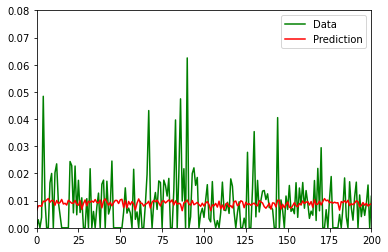

In [7]:
# Short visualization of how the Linear Regression works

data = np.atleast_2d(DATA[["skin","refNum"]])
labels = np.atleast_2d(DATA["reds/N"])

a = LinearRegression()
a.train(data, labels)
predictions = a.predict(data)

print('Predictions: ', predictions)

N = np.linspace(0, 1584, 1585)
plt.plot(N, labels.reshape((1585)), color='green', label='Data')
plt.plot(N, predictions.reshape((1585)), color='red', label='Prediction')
plt.xlim(0, 200)
plt.ylim(0, 0.08)
plt.legend()
plt.show()

#### Regression Forest

In [8]:
# Base classes
class Node:
    pass

class Tree:
    def __init__(self):
        self.root = Node()
    
    def find_leaf(self, x):
        node = self.root
        while hasattr(node, "feature"):
            j = node.feature
            if x[j] <= node.threshold:
                node = node.left
            else:
                node = node.right
        return node

In [9]:
class RegressionTree(Tree):
    def __init__(self):
        super(RegressionTree, self).__init__()

    def train(self, data, labels, n_min=10):
        '''
        data: the feature matrix
        labels: the corresponding ground-truth responses
        n_min: termination criterion (don't split if a node contains fewer instances)
        '''
        N, D = data.shape
        D_try = int(np.sqrt(D)) # how many features to consider for each split decision

        # initialize the root node
        self.root.data = data
        self.root.labels = labels
        
        #put root in stack
        stack = [self.root]
        while len(stack):
            node = stack.pop()
            n = node.data.shape[0] # number of instances in present node
            if n >= n_min:
                # Call 'make_decision_split_node()' with 'D_try' randomly selected 
                # feature indices. This turns 'node' into a split node
                # and returns the two children, which must be placed on the 'stack'.
                perm = np.random.permutation(D)   # permute D indices
                left, right = make_decision_split_node(node, perm[:D_try]) #select :D_try of permuted indices
                                                       #for 'make_decision_split_node()'
                # put children in stack
                stack.append(left)
                stack.append(right)
            else:
                # Call 'make_decision_leaf_node()' to turn 'node' into a leaf node.
                make_decision_leaf_node(node)
                
    def predict(self, x):
        leaf = self.find_leaf(x)
        # compute p(y | x)
        return leaf.response 

In [10]:
def make_decision_split_node(node, feature_indices):
    '''
    node: the node to be split
    feature_indices: a numpy array of length 'D_try', containing the feature 
                     indices to be considered in the present split
    '''
    n, D = node.data.shape

    # find best feature j (among 'feature_indices') and best threshold t for the split
    e_min = 1e100
    j_min, t_min = 0, 0
    for j in feature_indices:
        # remove duplicate features
        dj = np.sort(np.unique(node.data[:,j]))
        # compute candidate thresholds in the middle between consecutive feature values
        tj = 0.5 * (dj[1:] + dj[:-1]) 
        # each candidate threshold we need to compute squared errors of the resulting children node
        for t in tj:
            left_indices = node.data[:,j] <= t
            ll = node.labels[left_indices]
            el = np.sum(np.square(ll - np.mean(ll)))
            lr = node.labels[node.data[:,j] > t]
            er = np.sum(np.square(lr - np.mean(lr)))
            # choose the the best threshold that minimizes sum of squared errors
            if el + er < e_min:
                e_min = el + er
                j_min = j
                t_min = t

    # create children
    left = Node()
    right = Node()
    
    # initialize 'left' and 'right' with the data subsets and labels
    # according to the optimal split found above
    left.data = node.data[node.data[:,j_min] <= t_min, :]
    left.labels = node.labels[node.data[:,j_min] <= t_min]
    right.data = node.data[node.data[:,j_min] > t_min, :]
    right.labels = node.labels[node.data[:,j_min] > t_min]

    # turn the current 'node' into a split node
    # (store children and split condition)
    node.left = left
    node.right = right
    node.feature = j_min
    node.threshold = t_min

    # return the children (to be placed on the stack)
    return left, right    

In [11]:
def make_decision_leaf_node(node):
    '''
    node: the node to become a leaf
    '''
    node.N = node.labels.shape[0]
    node.response = np.mean(node.labels)

In [12]:
class RegressionForest():
    def __init__(self, n_trees=10):
        # create ensemble
        self.trees = [RegressionTree() for i in range(n_trees)]
    
    def train(self, data, labels, n_min=10):
        for tree in self.trees:
            # train each tree, using a bootstrap sample of the data
            bootstrap = np.random.choice(len(data), size=len(data))
            tree.train(data[bootstrap], labels[bootstrap], n_min)

    def predict(self, x):
        # compute the ensemble prediction
        return np.mean([tree.predict(x) for tree in self.trees], axis=0)

C:\Users\Eugen\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Eugen\anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Predictions:  [0.0037775  0.00478382 0.01023267 ... 0.01359929 0.02073297 0.00702685]


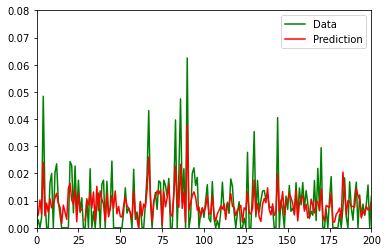

In [13]:
# Short visualization of how the Regression Forest works

data = np.atleast_2d(DATA[["skin","refNum"]])
labels = np.atleast_2d(DATA["reds/N"]).reshape((len(data)))

b = RegressionForest()
b.train(data, labels)

predictions = np.zeros(len(data[:,0]))

for i in range(len(data[:,0])):
    predictions[i] = b.predict(data[i,:])

print('Predictions: ', predictions)

N = np.linspace(0, 1584, 1585)
plt.plot(N,labels.reshape((1585)), color='green', label='Data')
plt.plot(N,predictions.reshape((1585)), color='red', label='Prediction')
plt.xlim(0, 200)
plt.ylim(0, 0.08)
plt.legend()
plt.show()

We see that the Regression Forest is much more flexible and fits the data better.

#### Cross-Validation

In [14]:
def cross_validate(n_folds, data, labels):
    N, D = data.shape
    linear_regression = LinearRegression()
    regression_forest = RegressionForest()

    results = []
    error_rates_linear = []; error_rates_forest = []

    perm = range(N)
    X_folds = np.array_split(data[perm], n_folds)
    y_folds = np.array_split(labels[perm], n_folds)

    for n in range(n_folds):
        # construct train and test set from folds
        X_train_f = np.concatenate([X_folds[i] for i in range(n_folds) if i != n])
        X_test_f = X_folds[n]
        y_train_f = np.concatenate([y_folds[i] for i in range(n_folds) if i != n])
        y_test_f = y_folds[n]

        # run linear regression
        beta, b = linear_regression.train(X_train_f, y_train_f)
        results_linear = linear_regression.predict(X_test_f)
        error_rates_linear.append(np.sum(np.square(results_linear - y_test_f)))

        # run regression forest
        regression_forest.train(X_train_f, y_train_f)
        results_forest = np.zeros(len(X_test_f[:,0]))
        for i in range(len(X_test_f[:,0])):
            results_forest[i] = regression_forest.predict(X_test_f[i,:])
        error_rates_forest.append(np.sum(np.square((results_forest - y_test_f)[np.isfinite(results_forest)]))) # filter out nan


    results.append(np.array(
            [[np.mean(error_rates_linear), np.std(error_rates_linear)],
              [np.mean(error_rates_forest), np.std(error_rates_forest)]]
        ))

    return results[0]

In [15]:
# Perform cross-validation for 10 folds

errors = cross_validate(10, data, labels)

C:\Users\Eugen\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Eugen\anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [16]:
print('Linear Regression Error: {:2.2%} +- {:2.2%}.'.format(errors[0][0], errors[0][1]))
print('Regression Forest Error: {:2.2%} +- {:2.2%}.'.format(errors[1][0], errors[1][1]))

Linear Regression Error: 1.74% +- 0.55%.
Regression Forest Error: 2.17% +- 0.64%.


In [17]:
# Dependence on the n-folds

errors_linear = []
errors_forest = []
stds_linear = []
stds_forest = []

for i in range(2,11):
    errors = cross_validate(i, data, labels)
    errors_linear.append(errors[0][0])
    errors_forest.append(errors[1][0])
    stds_linear.append(errors[0][1])
    stds_forest.append(errors[1][1])

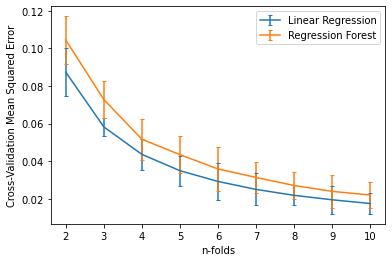

In [18]:
n = np.linspace(2, 10, 9)
plt.errorbar(n, errors_linear, yerr=stds_linear, label='Linear Regression', capsize=2)
plt.errorbar(n, errors_forest, yerr=stds_forest, label='Regression Forest', capsize=2)
plt.xlabel('n-folds')
plt.ylabel('Cross-Validation Mean Squared Error')
plt.legend()
plt.show()

We can follow that the error of the Regression Forest is slightly higher than that of the Linear Regression. It seems like the Regression Forest fits the training data very well but doesn't generalize so well for unseen data.

### 2.3 Answering the research question

In [20]:
# Produce 19 different test sets with shuffled skin color variable

def permutation_test(n_folds, data, labels, n_permutations):
    # produce some array to fit the data in
    performation_data = np.full((n_permutations, len(data), len(data[0])), data)
    skin_var = data[:,0] # skin has to be at first position in data

    for i in range(n_permutations):
        # shuffle skin data and then write it into the data set
        np.random.shuffle(skin_var)
        performation_data[i,:,0] = skin_var
    
    # calculate the cross validation error for each data set
    performation_test_error = np.zeros((n_permutations, 2, 2))
    for i in range(n_permutations):
        performation_test_error[i] = cross_validate(n_folds, performation_data[i], labels)
    
    return performation_test_error

In [21]:
# Get the error for all permutations seperately

error_with_perm = permutation_test(4, data, labels, 19)

In [23]:
error_no_perm = cross_validate(4, data, labels)

We produced N_permutations data sets with differently shuffeled skin variable among the players. Then we calculate the error by cross-validation. If the error of the shuffeled datasets is always larger than the original dataset, we can state thatthere is a bias. The following graph should show wether the error is above or below the original datset for the several shuffeled datasets.

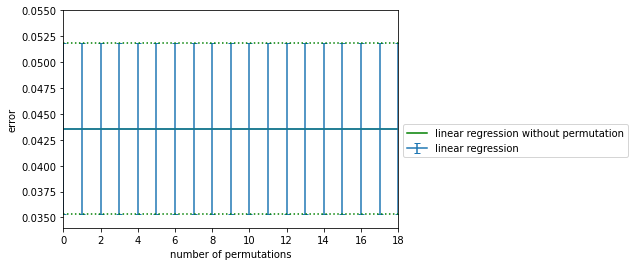

In [48]:
n = np.arange(19) #number of permutations

plt.errorbar(n, error_with_perm[:,0,0], yerr=error_with_perm[:,0,1], label="linear regression", capsize=3)
plt.plot(n, np.full(len(n),error_no_perm[0,0]), "g", label="linear regression without permutation")
plt.plot(n, np.full(len(n),error_no_perm[0,0])+np.full(len(n),error_no_perm[0,1]), ":", color="g")
plt.plot(n, np.full(len(n),error_no_perm[0,0])-np.full(len(n),error_no_perm[0,1]), ":", color="g")

plt.ylabel("error")
plt.xlabel("number of permutations")
plt.xlim(0,18)
plt.ylim(0.034,0.055)
plt.legend(bbox_to_anchor=(1, 0.5))
plt.show()

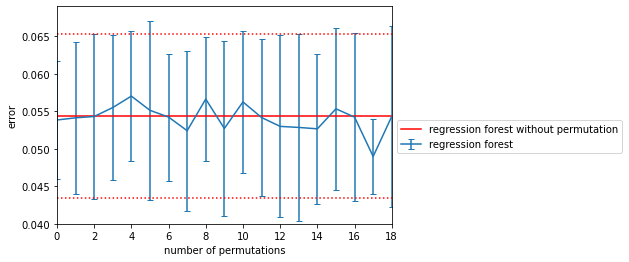

In [46]:
plt.errorbar(n, error_with_perm[:,1,0], yerr=error_with_perm[:,1,1], label="regression forest", capsize=3)
plt.plot(n, np.full(len(n),error_no_perm[1,0]), "r", label="regression forest without permutation")
plt.plot(n, np.full(len(n),error_no_perm[1,0])+np.full(len(n),error_no_perm[1,1]), ":", color="r")
plt.plot(n, np.full(len(n),error_no_perm[1,0])-np.full(len(n),error_no_perm[1,1]), ":", color="r")

plt.ylabel("error")
plt.xlabel("number of permutations")
plt.xlim(0,18)
plt.ylim(0.04,0.069)
plt.legend(bbox_to_anchor=(1, 0.5))
plt.show()

Since the absolute error of the Regression Forest with permutations is not significantly larger than the absolute error of the Regression Forest without permutations (we have the same behavior for the Linear Regression model), this gives rise to no bias!
We thus think that there is no correspondence between the skin color of a player and the number of red cards.